# Exercise 1

## Imports

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Pendulum model
$
 \binom{\dot{\phi}}{\dot{\omega}} = \binom{\omega}{-b*\omega-\frac{g}{l}*\sin{\phi}}\\
 y(t) = \binom{\phi(t)}{\omega(t)}\\
 y(0) = \binom{initAngle}{initVelocity}
$

The set of ordinary differnetial equations can be solved numerical by libraries like scipy.  

The formula needs three constants:  
$g=9.81$  
$l=length\ of\ pendulum$  
$b=friction$


In [3]:
def pendulumModel (y, t, g, l, b):
    phi = y[0]
    omega = y[1]
    dphidt = omega
    domegadt = -b * omega - (g/l) * np.sin(phi)
    return [dphidt, domegadt]

## Pendulum without friction

For the pendulum without friction $b=0$, so we will not loose any speed.

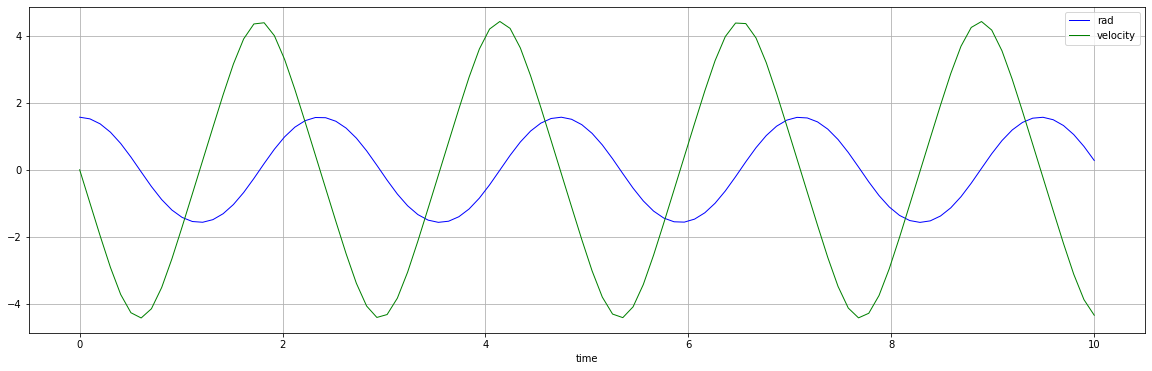

In [6]:
g = 9.81
l = 1

# No friction
b = 0

# degree: 45, velocity: 0 
y0 = [np.pi/2, 0]
t = np.linspace(0,10, 100)
# Solve equation
res = odeint(pendulumModel,y0,t,args=(g, l, b))

# Plot results
plt.plot(t,res[:,0], 'b-', linewidth=1, label='rad')
plt.plot(t,res[:,1], 'g-', linewidth=1, label='velocity')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.rcParams['figure.figsize'] = (20,12)
plt.show()

## Pendulum with friction

For this type of the pendulum we have to specify $b>0$.
The speedreduction depends on the size of $b$.  
We will try out the follwing values for $b$:
$$
\begin{align*}
    b1 &= 0.25\\
    b2 &= 0.5\\
    b3 &= 0.75\\
\end{align*}
$$

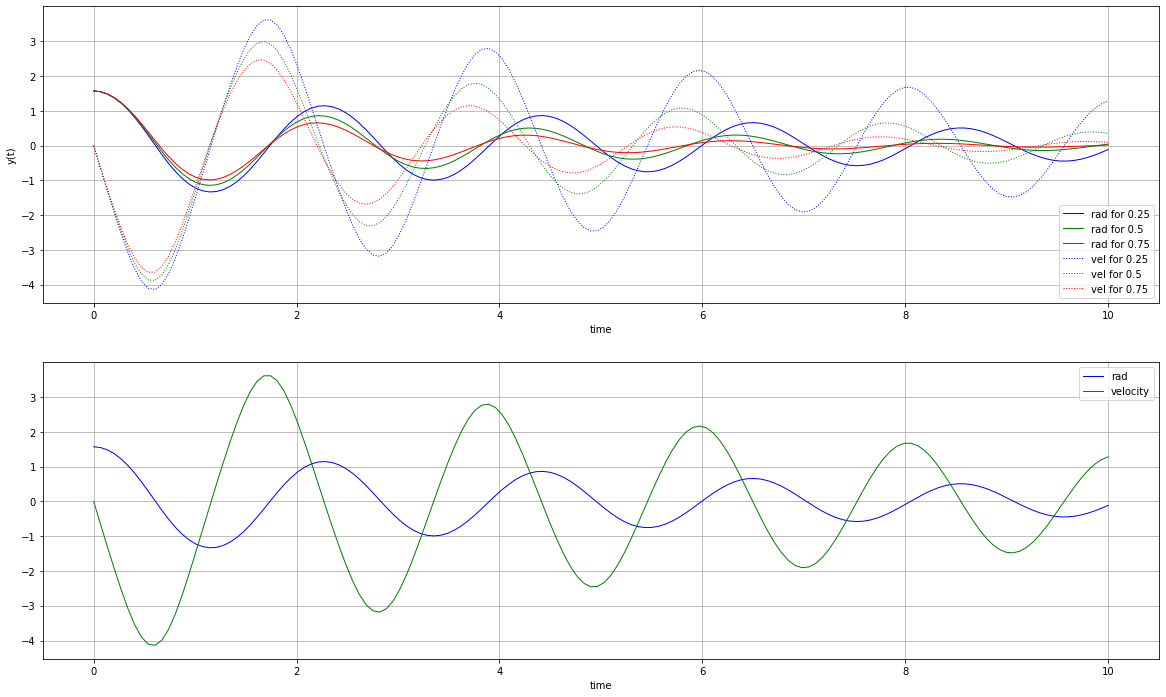

In [8]:
# Pendulum with friction 
b1 = 0.25
b2 = 0.5
b3 = 0.75

# degree: 45, velocity: 0 
y0 = [np.pi/2, 0]
t = np.linspace(0,10, 150)

# Solve equation
res1 = odeint(pendulumModel,y0,t,args=(g, l, b1))
res2 = odeint(pendulumModel,y0,t,args=(g, l, b2))
res3 = odeint(pendulumModel,y0,t,args=(g, l, b3))

# Plot radiants
plt.subplot(2, 1, 1)
plt.plot(t,res1[:,0], 'b-', linewidth=1, label='rad for 0.25')
plt.plot(t,res2[:,0], 'g-', linewidth=1, label='rad for 0.5')
plt.plot(t,res3[:,0], 'r-', linewidth=1, label='rad for 0.75')
# Plot velocity
plt.plot(t,res1[:,1], ':b', linewidth=1, label='vel for 0.25')
plt.plot(t,res2[:,1], ':g', linewidth=1, label='vel for 0.5')
plt.plot(t,res3[:,1], ':r', linewidth=1, label='vel for 0.75')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend(loc='best')
plt.grid()

# Single pendulum, b=0.25
plt.subplot(2, 1, 2)
plt.plot(t,res1[:,0], 'b-', linewidth=1, label='rad')
plt.plot(t,res1[:,1], 'g-', linewidth=1, label='velocity')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()

plt.show()
